In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), epochs=100, verbose=1)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.3868 - loss: 1.7576 - val_accuracy: 0.5360 - val_loss: 1.3213
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6291 - loss: 1.0410 - val_accuracy: 0.6286 - val_loss: 1.0545
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6990 - loss: 0.8574 - val_accuracy: 0.7353 - val_loss: 0.7748
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7339 - loss: 0.7523 - val_accuracy: 0.6904 - val_loss: 0.8776
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7596 - loss: 0.6859 - val_accuracy: 0.7802 - val_loss: 0.6457
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7787 - loss: 0.6307 - val_accuracy: 0.7755 - val_loss: 0.6494
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7959 - loss: 0.5853 - val_accuracy: 0.7804 - val_loss: 0.6320
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8107 - loss: 0.5389 - 

Test Loss: 0.4580065906047821, Test Accuracy: 0.8769000172615051
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


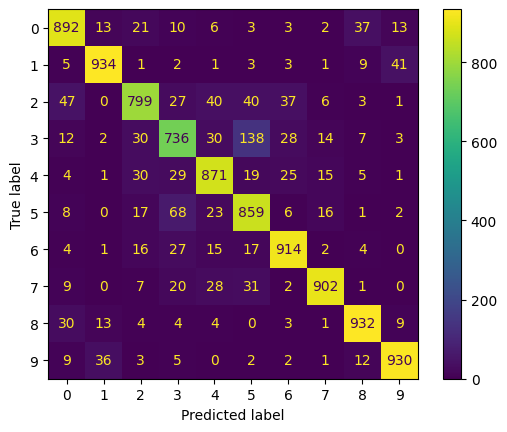

Precision: 0.8775579373766046
F1 Score: 0.8767088563961993
Recall: 0.8769


In [5]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
ytest = np.argmax(y_test, 1)

confusionMatrix = confusion_matrix(ytest , y_pred)
display = ConfusionMatrixDisplay(confusionMatrix , display_labels= np.arange(10))
display.plot()
plt.show()

precision = precision_score(ytest , y_pred, average='macro')
print(f'Precision: {precision}')
f1 = f1_score(ytest , y_pred, average='macro')
print(f'F1 Score: {f1}')
recall = recall_score(ytest , y_pred , average='macro')
print(f'Recall: {recall}')

Text(0.5, 1.0, 'Accuracy Curves')

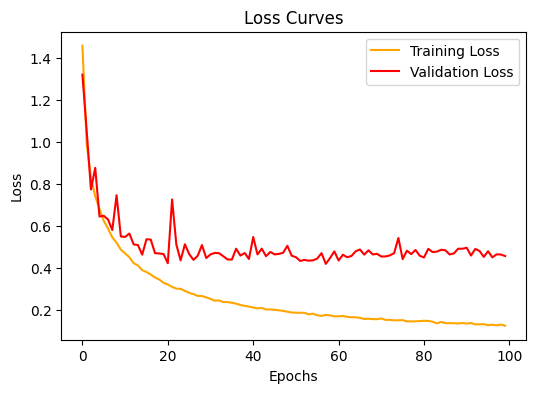

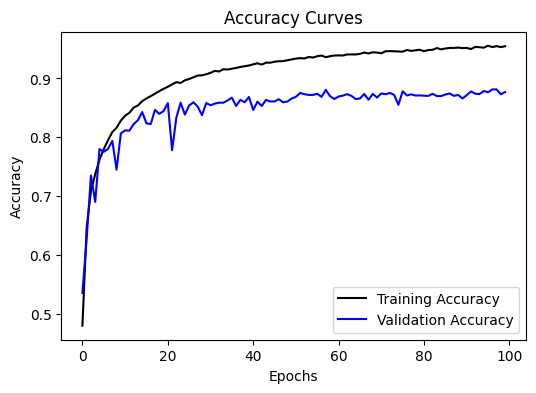

In [6]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='red')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')


plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], color='black')
plt.plot(history.history['val_accuracy'], color='blue')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')